In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import datetime as dt

# import seaborn as sns
import pandas as pd
import geopandas as gpd
from sodapy import Socrata
import plotly.figure_factory as ff

%load_ext lab_black

In [2]:
# client = Socrata("data.austintexas.gov", None)
# results = client.get("7d8e-dm7r", limit=83000000)

# # Convert to pandas DataFrame
# df = pd.DataFrame.from_records(results)

In [3]:
df = pd.read_csv("../data/Shared_Micromobility_Vehicle_Trips.csv", low_memory=False)

#df.to_csv("../data/Shared_Micromobility_Vehicle_Trips.csv", index=False)

In [4]:
df.tail()

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district_start,council_district_end,year,census_geoid_start,census_geoid_end
10218813,7508675a-38a8-4195-9260-b7f2507ccedd,faff7d65-ccd9-4c2a-9208-4d92aeee9920,scooter,551,1042.6570268422067,2021-01-18T01:45:00.000,2021-01-18T02:00:00.000,2021-01-19T02:16:17.000,1,2,0,1,9,2021,48453000901,48453001100
10218814,9d884348-ac4d-40ab-b0a4-6d5a1f0c2aeb,bb01f886-85e9-44d3-9c14-0c2b2c32c0cb,scooter,935,4145.704281096752,2021-01-18T02:15:00.000,2021-01-18T02:30:00.000,2021-01-19T03:16:24.000,1,2,0,9,9,2021,48453001305,48453001100
10218815,d9eea601-06de-4866-b762-20f1529a7af2,1f1e62a7-a150-45a5-9e40-179241943396,scooter,74,227.18649382050472,2021-01-18T02:15:00.000,2021-01-18T02:15:00.000,2021-01-19T03:16:28.000,1,2,0,9,9,2021,48453001100,48453001100
10218816,f5e9b71a-34d2-4e01-afb9-1da5ccb29743,10c19a71-e3b8-452f-be0b-581365ae1a95,scooter,78,179.85522634767358,2021-01-18T02:15:00.000,2021-01-18T02:15:00.000,2021-01-19T03:16:26.000,1,2,0,9,9,2021,48453001200,48453001200
10218817,e6a44faa-bbd5-4be6-a68c-ad35d0d1eb27,9d8c5315-2f52-425d-9337-a3e9126abcf8,scooter,348,1270.1931092395125,2021-01-18T02:15:00.000,2021-01-18T02:15:00.000,2021-01-19T03:16:24.000,1,2,0,9,9,2021,48453001305,48453001305


In [5]:
df.describe()

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district_start,council_district_end,year,census_geoid_start,census_geoid_end
count,10218818,10218818,10218818,10218818,10218818,10218818,10218818,10218818,10218818,10218818,10218818,10218684,10218684,10218818,10218683,10218683
unique,10218818,97719,3,17096,128204,92492,92577,544565,12,24,7,12,12,4,297,302
top,21d6092f-c9bb-4809-b90a-b56f27f3aeed,49b0ba01-7c8b-4504-b8b0-ff3380ffce83,scooter,240,0,2019-03-16T16:45:00.000,2019-03-10T16:45:00.000,2019-04-17T02:35:02.000,10,17,6,9,9,2019,48453001100,48453001100
freq,1,848,9663486,19262,713316,1441,1372,13277,1268820,802771,2075110,8020715,7872064,6037995,4067259,3940126


In [6]:
df.shape

(10218818, 16)

### Scooters Vs Bicycle Counts

In [7]:
df["vehicle_type"].value_counts()

scooter    9663486
bicycle     465129
moped        90203
Name: vehicle_type, dtype: int64

### Year counts

In [8]:
df["year"].value_counts()

2019    6037995
2018    2305093
2020    1796939
2021      78791
Name: year, dtype: int64

### Find number of Null Values: 

In [9]:
df.apply(lambda x: x.isnull().value_counts())

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district_start,council_district_end,year,census_geoid_start,census_geoid_end
False,10218818.0,10218818.0,10218818.0,10218818.0,10218818.0,10218818.0,10218818.0,10218818.0,10218818.0,10218818.0,10218818.0,10218684,10218684,10218818.0,10218683,10218683
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134,134,NaN,135,135


In [10]:
df["trip_distance"] = df["trip_distance"].apply(float)

In [ ]:
df = df.dropna()

### Find all the 0 meters or negative meters trip distance values.

In [14]:
rows = df.shape[0]

trips_df = df[df["trip_distance"] > 0]
neg_0m_rows = rows - trips_df.shape[0]
rows_remaining = trips_df.shape[0]
print("Negative or 0m distance trips: " + str(neg_0m_rows))

Negative or 0m distance trips: 713984


In [16]:
len(df[df["trip_distance"] <= 0])

713984

### Yearly Analysis

In [17]:
year_count = df.groupby(["year"]).count()["trip_id"]

In [18]:
year_count

year
2018    2305093
2019    6037995
2020    1796939
2021      78791
Name: trip_id, dtype: int64

In [19]:
year_df = df.groupby(["year", "vehicle_type"]).count()["trip_id"]

In [20]:
year_df

year  vehicle_type
2018  bicycle           76605
      scooter         2228488
2019  bicycle          340145
      moped             14098
      scooter         5683752
2020  bicycle           44950
      moped             76105
      scooter         1675884
2021  bicycle            3429
      scooter           75362
Name: trip_id, dtype: int64

In [12]:
df.apply(lambda x: x.isnull().value_counts())

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district_start,council_district_end,year,census_geoid_start,census_geoid_end
False,10218818.0,10218818.0,10218818.0,10218818.0,10218818.0,10218818.0,10218818.0,10218818.0,10218818.0,10218818.0,10218818.0,10218684,10218684,10218818.0,10218683,10218683
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134,134,NaN,135,135


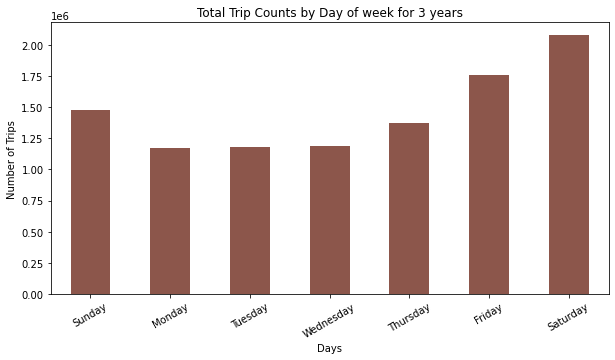

In [21]:
# Count trips per day and sort by day:
daily_total = pd.DataFrame(df["day_of_week"].value_counts().sort_index())

# Map day of week with actual names:
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
daily_total["Days"] = days

# Plot glyph:
daily_total.plot(
    kind="bar",
    x="Days",
    y="day_of_week",
    title="Total Trip Counts by Day of week for 3 years",
    figsize=(10, 5),
    rot=30,
    color="tab:brown",
    legend=False,
)
plt.ylabel("Number of Trips")
# plt.savefig("Plots/trips_per_week.png")
plt.show()

In [22]:
two_years_df = df.loc[(df["year"] == "2019") | (df["year"] == "2020")]
two_years_df.head()

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district_start,council_district_end,year,census_geoid_start,census_geoid_end
0,f33ffbe9-7462-4310-8d79-382842d4f374,61a22e55-d5b3-4fde-8d9a-ccaed12ce35c,scooter,2133,12794.0,2020-04-18T05:15:00.000,2020-04-18T05:45:00.000,2020-04-19T07:30:34.000,4,5,5,9,4,2020,48453001100,48453001806
1,ddf0fa7c-41e2-43c4-b7ea-e4b7a323be78,f07ddca9-59b3-4ac0-a02b-459a42f8b58b,scooter,197,917.0,2020-04-18T05:30:00.000,2020-04-18T05:45:00.000,2020-04-19T07:30:33.000,4,5,5,3,3,2020,48453000902,48453000902
2,2d895f0c-9586-4458-9e58-99cac4bc0191,8ced24e4-7396-4bd4-884a-fc7733ecfae3,scooter,721,3621.0,2020-04-18T05:15:00.000,2020-04-18T05:30:00.000,2020-04-19T07:30:33.000,4,5,5,9,1,2020,48453000304,48453002105
3,b180f674-0e1d-4d78-9838-2b20a45bf9d2,1ed7b1f7-a174-422e-a4a2-d688e59732a9,scooter,214,788.0,2020-04-18T05:15:00.000,2020-04-18T05:15:00.000,2020-04-19T07:30:33.000,4,5,5,5,5,2020,48453001901,48453001901
4,aa2bc2f8-fd08-4e58-85c4-90c44be2fe4d,4da13a13-db11-4610-a844-97a19d82fefa,scooter,622,3009.0,2020-04-18T05:00:00.000,2020-04-18T05:15:00.000,2020-04-19T07:30:33.000,4,5,5,9,9,2020,48453000601,48453000304


In [23]:
two_years_df.shape

(7834934, 16)

In [24]:
two_years_df.groupby(["year", "vehicle_type"]).count()["trip_id"]

year  vehicle_type
2019  bicycle          340145
      moped             14098
      scooter         5683752
2020  bicycle           44950
      moped             76105
      scooter         1675884
Name: trip_id, dtype: int64

### Split the data for 2019 and 2020

In [25]:
year2019 = df.loc[(df["year"] == "2019")]
year2020 = df.loc[(df["year"] == "2020")]

In [24]:
year2019.groupby(["vehicle_type"]).count()["trip_id"]

Series([], Name: trip_id, dtype: int64)

In [25]:
year2020.groupby(["vehicle_type"]).count()["trip_id"]

Series([], Name: trip_id, dtype: int64)

In [26]:
year2019.shape

(0, 16)

In [27]:
year2020.shape

(0, 16)

In [29]:
year2019 = year2019.drop(
    columns=["council_district_start", "council_district_end", "modified_date"]
)
year2020 = year2020.drop(
    columns=["council_district_start", "council_district_end", "modified_date"]
)

In [30]:
year2019.to_csv("../data/2019data.csv", index=False)
year2020.to_csv("../data/2020data.csv", index=False)

In [31]:
#df.to_csv("../data/Shared_Micromobility_Vehicle_Trips.csv", index=False)

In [31]:
year2020

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,month,hour,day_of_week,year,census_geoid_start,census_geoid_end
0,f33ffbe9-7462-4310-8d79-382842d4f374,61a22e55-d5b3-4fde-8d9a-ccaed12ce35c,scooter,2133,12794.0,2020-04-18T05:15:00.000,2020-04-18T05:45:00.000,4,5,5,2020,48453001100,48453001806
1,ddf0fa7c-41e2-43c4-b7ea-e4b7a323be78,f07ddca9-59b3-4ac0-a02b-459a42f8b58b,scooter,197,917.0,2020-04-18T05:30:00.000,2020-04-18T05:45:00.000,4,5,5,2020,48453000902,48453000902
2,2d895f0c-9586-4458-9e58-99cac4bc0191,8ced24e4-7396-4bd4-884a-fc7733ecfae3,scooter,721,3621.0,2020-04-18T05:15:00.000,2020-04-18T05:30:00.000,4,5,5,2020,48453000304,48453002105
3,b180f674-0e1d-4d78-9838-2b20a45bf9d2,1ed7b1f7-a174-422e-a4a2-d688e59732a9,scooter,214,788.0,2020-04-18T05:15:00.000,2020-04-18T05:15:00.000,4,5,5,2020,48453001901,48453001901
4,aa2bc2f8-fd08-4e58-85c4-90c44be2fe4d,4da13a13-db11-4610-a844-97a19d82fefa,scooter,622,3009.0,2020-04-18T05:00:00.000,2020-04-18T05:15:00.000,4,5,5,2020,48453000601,48453000304
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10218800,8116d7e1-2412-474b-bf3b-c36b8305625d,ef2352da-c873-4b0c-83d6-95f15b33a23c,scooter,658,1420.0,2020-12-19T23:45:00.000,2020-12-20T00:00:00.000,12,0,6,2020,48453001305,48453001305
10218801,280d0745-4a9b-493c-80a2-e0fac0d6bb60,0cd6ed47-fcb2-460e-860a-61e38e605f72,scooter,372,2851.0,2020-12-19T23:45:00.000,2020-12-20T00:00:00.000,12,0,6,2020,48453001100,48453001100
10218802,29c9d50f-5371-4a24-955f-6a81dbd44bcb,2041b5d6-f94c-45cc-a88f-82b06400a8f3,scooter,369,1185.0,2020-12-19T23:45:00.000,2020-12-20T00:00:00.000,12,0,6,2020,48453001100,48453001100
10218803,1f113eb7-ba3c-4e7c-b503-1bdef61b846a,aa286afe-7edb-413d-a075-159e78a0cd36,scooter,481,2127.0,2020-12-19T23:45:00.000,2020-12-20T00:00:00.000,12,0,6,2020,48453001401,48453001100
